In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.shape

(1000, 8)

Data check:
Check missing value
Check duplicates
Check data types
Check the number of unique values
Check statistics of dataset
Check various categories present in the different categorical column

In [24]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value

In [25]:
df.duplicated().sum()

0

There is no duplicate value

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [30]:
print("Categories in 'gender' variable : ",end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable : ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable : ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'test preparation course' variable : ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [31]:
#define numerical and categorical column
numeric_feature = [feature for feature in  df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in  df.columns if df[feature].dtype =='O']

print(f"We have {len(numeric_feature)} numerical features : {numeric_feature}")
print(f"We have {len(categorical_feature)} numerical features : {categorical_feature}")

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [33]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of student with full marks in math {math_full}')
print(f'Number of student with full marks in reading {reading_full}')
print(f'Number of student with full marks in writing {writing_full}')

Number of student with full marks in math 7
Number of student with full marks in reading 17
Number of student with full marks in writing 14


In [35]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of student with less the 20 marks in math {math_less_20}')
print(f'Number of student with less the 20 marks in reading {reading_less_20}')
print(f'Number of student with less the 20 marks in writing {writing_less_20}')

Number of student with less the 20 marks in math 4
Number of student with less the 20 marks in reading 1
Number of student with less the 20 marks in writing 3


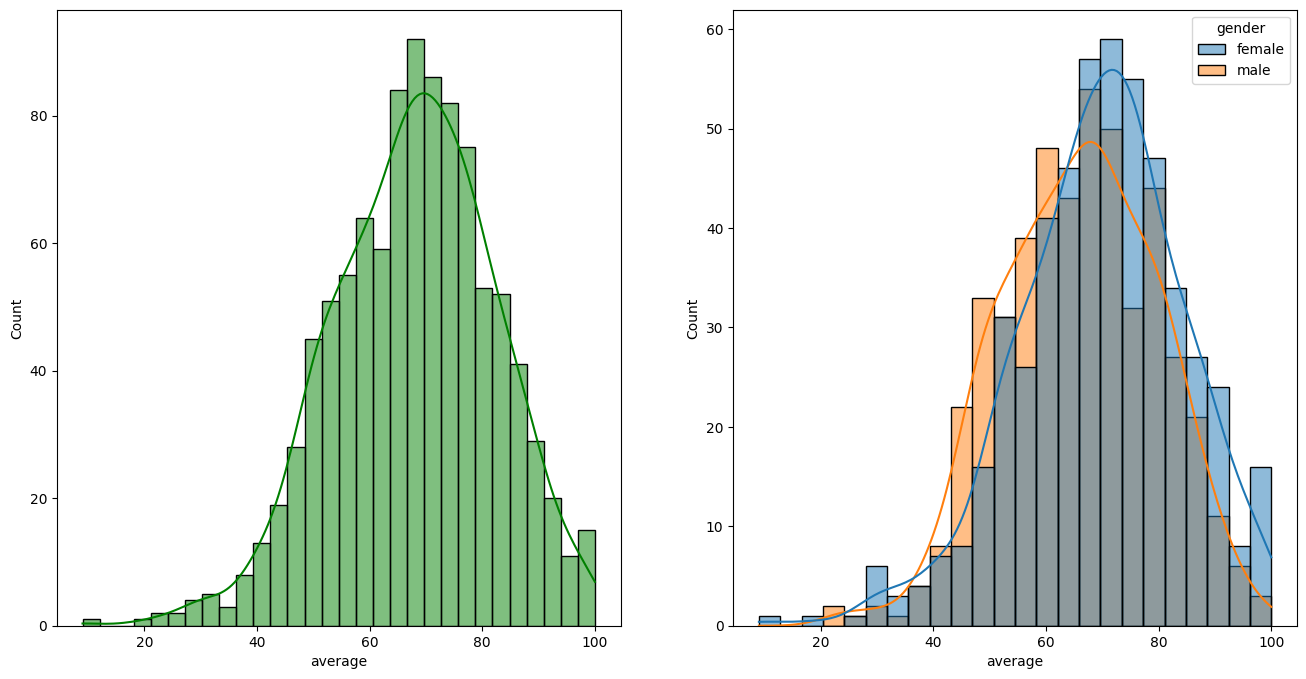

In [36]:
plt.subplots(1, 2, figsize=(16,8))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

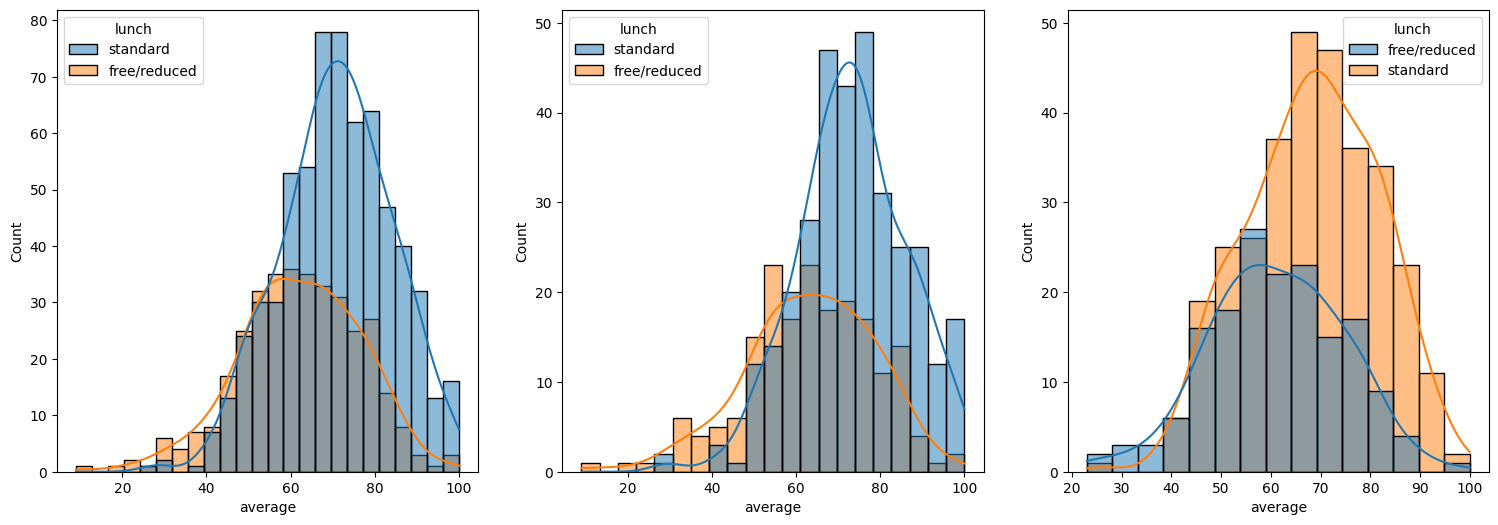

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()